In [6]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report,
                           roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns

# 设置随机种子以确保结果可重复
np.random.seed(42)

# 加载数据
train_data = pd.read_csv('Census Income Data Set/train_data.csv')
test_data = pd.read_csv('Census Income Data Set/test_data.csv')

# 准备特征和目标变量
X_train = train_data.drop('income', axis=1)
y_train = train_data['income']
X_test = test_data.drop('income', axis=1)
y_test = test_data['income']

print("数据集信息：")
print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")
print(f"特征数量: {X_train.shape[1]}")

数据集信息：
训练集大小: (21113, 93)
测试集大小: (9049, 93)
特征数量: 93


In [7]:
# 定义超参数网格
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],               # 正则化类型
    'solver': ['liblinear', 'saga'],       # 优化算法
    'max_iter': [1000]                     # 最大迭代次数
}

# 解释超参数选择：
# C: 较大的值表示较弱的正则化，较小的值表示较强的正则化
# penalty: l1可以进行特征选择，l2可以处理多重共线性
# solver: liblinear和saga都支持l1正则化，且适用于大规模数据
# max_iter: 设置较大的值确保收敛

# 初始化网格搜索
grid_search = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,                 # 5折交叉验证
    scoring='accuracy',   # 使用准确率作为评估指标
    n_jobs=-1,           # 使用所有可用的CPU核心
    verbose=1
)

# 执行网格搜索
import time
print("开始网格搜索...")
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# 计算并输出训练时间
grid_search_time = end_time - start_time
print(f"\n网格搜索完成！")
print(f"网格搜索训练时间: {grid_search_time:.2f} 秒 ({grid_search_time/60:.2f} 分钟)")

# 输出最佳参数
print("\n最佳参数：")
print(grid_search.best_params_)
print(f"\n最佳交叉验证得分：{grid_search.best_score_:.4f}")

# 查看所有参数组合的结果
cv_results = pd.DataFrame(grid_search.cv_results_)
print("\n所有参数组合的平均得分（前5个）：")
print(cv_results[['params', 'mean_test_score', 'std_test_score']].head())

开始网格搜索...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

网格搜索完成！
网格搜索训练时间: 32.13 秒 (0.54 分钟)

最佳参数：
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

最佳交叉验证得分：0.8320

所有参数组合的平均得分（前5个）：
                                              params  mean_test_score  \
0  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'...         0.771610   
1  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1'...         0.768768   
2  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'...         0.810875   
3  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'...         0.810686   
4  {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1',...         0.819685   

   std_test_score  
0        0.001598  
1        0.001633  
2        0.003740  
3        0.003198  
4        0.003012  

网格搜索完成！
网格搜索训练时间: 32.13 秒 (0.54 分钟)

最佳参数：
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

最佳交叉验证得分：0.8320

所有参数组合的平均得分（前5个）：
                                              params  mean_test_score  \
0  {'C':

开始训练最终模型...
最终模型训练完成！
最终模型训练时间: 0.3144 秒

模型性能评估：

混淆矩阵：
[[6234  563]
 [ 990 1262]]

分类报告：
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6797
           1       0.69      0.56      0.62      2252

    accuracy                           0.83      9049
   macro avg       0.78      0.74      0.75      9049
weighted avg       0.82      0.83      0.82      9049

最终模型训练完成！
最终模型训练时间: 0.3144 秒

模型性能评估：

混淆矩阵：
[[6234  563]
 [ 990 1262]]

分类报告：
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6797
           1       0.69      0.56      0.62      2252

    accuracy                           0.83      9049
   macro avg       0.78      0.74      0.75      9049
weighted avg       0.82      0.83      0.82      9049



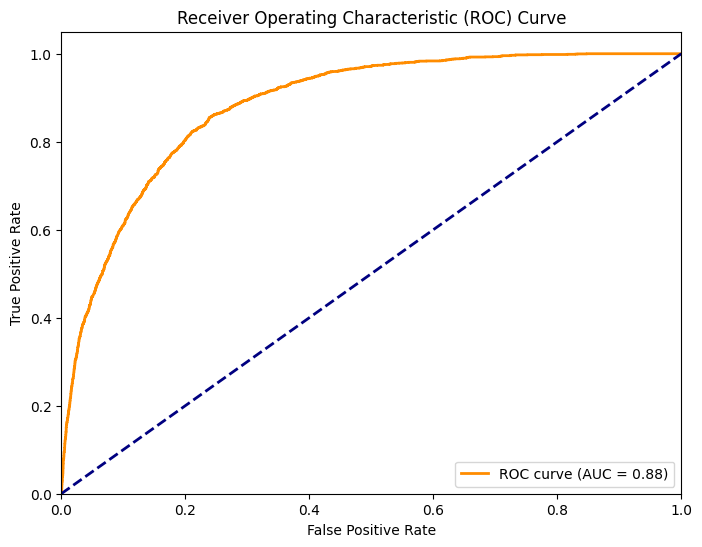

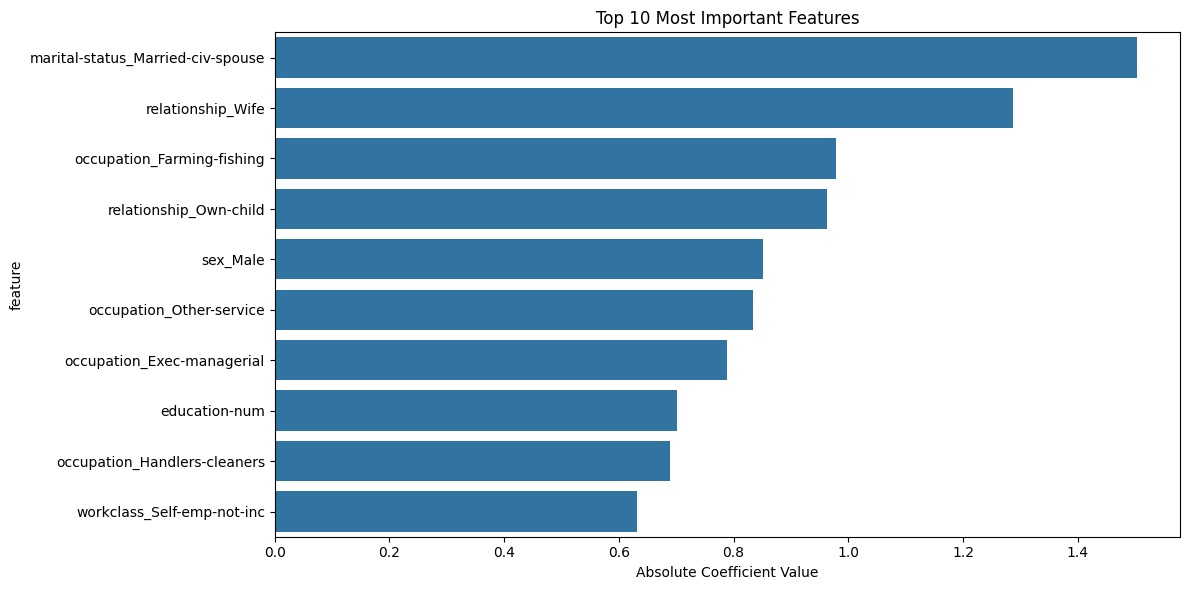


前10个最重要的特征：
                              feature  importance
25  marital-status_Married-civ-spouse    1.502992
47                  relationship_Wife    1.286413
33         occupation_Farming-fishing    0.979360
45             relationship_Own-child    0.962515
52                           sex_Male    0.851233
36           occupation_Other-service    0.833339
32         occupation_Exec-managerial    0.789290
1                       education-num    0.700508
34       occupation_Handlers-cleaners    0.689984
6          workclass_Self-emp-not-inc    0.630962


In [8]:
# 使用最佳参数训练最终模型
print("开始训练最终模型...")
final_start_time = time.time()
best_model = LogisticRegression(**grid_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)
final_end_time = time.time()

# 计算并输出最终模型训练时间
final_training_time = final_end_time - final_start_time
print(f"最终模型训练完成！")
print(f"最终模型训练时间: {final_training_time:.4f} 秒")

# 在测试集上进行预测
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# 计算各种评估指标
print("\n模型性能评估：")
print("\n混淆矩阵：")
print(confusion_matrix(y_test, y_pred))

print("\n分类报告：")
print(classification_report(y_test, y_pred))

# 绘制ROC曲线
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 分析特征重要性
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': np.abs(best_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

print("\n前10个最重要的特征：")
print(feature_importance.head(10))

In [9]:
# 保存训练好的模型
joblib.dump(best_model, 'LogisticRegression_model.pkl')
print("模型已保存为 'LogisticRegression_model.pkl'")

# 输出训练时间总结
print("\n=== 训练时间总结 ===")
total_training_time = grid_search_time + final_training_time
print(f"网格搜索时间: {grid_search_time:.2f} 秒 ({grid_search_time/60:.2f} 分钟)")
print(f"最终模型训练时间: {final_training_time:.4f} 秒")
print(f"总训练时间: {total_training_time:.2f} 秒 ({total_training_time/60:.2f} 分钟)")

# 计算每个参数组合的平均训练时间
n_param_combinations = len(param_grid['C']) * len(param_grid['penalty']) * len(param_grid['solver'])
avg_time_per_combination = grid_search_time / (n_param_combinations * 5)  # 5折交叉验证
print(f"\n每个参数组合的平均训练时间: {avg_time_per_combination:.4f} 秒")
print(f"总参数组合数: {n_param_combinations}")
print(f"交叉验证折数: 5")
print(f"总训练次数: {n_param_combinations * 5}")

模型已保存为 'LogisticRegression_model.pkl'

=== 训练时间总结 ===
网格搜索时间: 32.13 秒 (0.54 分钟)
最终模型训练时间: 0.3144 秒
总训练时间: 32.45 秒 (0.54 分钟)

每个参数组合的平均训练时间: 0.2678 秒
总参数组合数: 24
交叉验证折数: 5
总训练次数: 120


In [10]:
# 加载保存的模型并进行验证
print("开始验证保存的模型...")

# 1. 加载保存的模型
saved_model = joblib.load('LogisticRegression_model.pkl')

# 2. 验证模型参数
print("\n1. 验证模型参数：")
best_params = best_model.get_params()
saved_params = saved_model.get_params()

# 检查关键参数
key_params = ['C', 'penalty', 'solver', 'max_iter']
print("\n关键参数比较：")
for param in key_params:
    print(f"{param}:")
    print(f"  - 最佳模型: {best_params[param]}")
    print(f"  - 保存模型: {saved_params[param]}")
    print(f"  - 匹配: {'✓' if best_params[param] == saved_params[param] else '✗'}")

# 3. 验证模型系数
print("\n2. 验证模型系数：")
coef_match = np.allclose(best_model.coef_, saved_model.coef_, rtol=1e-5, atol=1e-8)
intercept_match = np.allclose(best_model.intercept_, saved_model.intercept_, rtol=1e-5, atol=1e-8)
print(f"系数矩阵匹配: {'✓' if coef_match else '✗'}")
print(f"截距项匹配: {'✓' if intercept_match else '✗'}")

if not coef_match:
    coef_diff = np.abs(best_model.coef_ - saved_model.coef_).max()
    print(f"最大系数差异: {coef_diff:.8f}")

# 4. 验证预测性能
print("\n3. 验证预测性能：")
# 在测试集上进行预测
best_pred = best_model.predict(X_test)
saved_pred = saved_model.predict(X_test)

# 计算并比较准确率
best_accuracy = best_model.score(X_test, y_test)
saved_accuracy = saved_model.score(X_test, y_test)

print(f"最佳模型准确率: {best_accuracy:.4f}")
print(f"保存模型准确率: {saved_accuracy:.4f}")
print(f"准确率差异: {abs(best_accuracy - saved_accuracy):.6f}")
print(f"预测结果完全相同: {'✓' if np.array_equal(best_pred, saved_pred) else '✗'}")

# 5. 验证预测概率
best_proba = best_model.predict_proba(X_test)
saved_proba = saved_model.predict_proba(X_test)
proba_match = np.allclose(best_proba, saved_proba, rtol=1e-5, atol=1e-8)
print(f"预测概率匹配: {'✓' if proba_match else '✗'}")

# 6. 总结验证结果
print("\n验证总结：")
params_match = all(best_params[param] == saved_params[param] for param in key_params)
all_matches = params_match and coef_match and intercept_match and np.array_equal(best_pred, saved_pred) and proba_match

if all_matches:
    print("✅ 验证通过！保存的模型与最佳模型完全一致。")
else:
    print("⚠️ 警告！发现以下问题：")
    if not params_match:
        print("- 模型参数不匹配")
    if not coef_match or not intercept_match:
        print("- 模型系数不匹配")
    if not np.array_equal(best_pred, saved_pred):
        print("- 预测结果不一致")
    if not proba_match:
        print("- 预测概率不一致")
    print("\n建议重新保存模型！")

开始验证保存的模型...

1. 验证模型参数：

关键参数比较：
C:
  - 最佳模型: 0.1
  - 保存模型: 0.1
  - 匹配: ✓
penalty:
  - 最佳模型: l2
  - 保存模型: l2
  - 匹配: ✓
solver:
  - 最佳模型: saga
  - 保存模型: saga
  - 匹配: ✓
max_iter:
  - 最佳模型: 1000
  - 保存模型: 1000
  - 匹配: ✓

2. 验证模型系数：
系数矩阵匹配: ✓
截距项匹配: ✓

3. 验证预测性能：
最佳模型准确率: 0.8284
保存模型准确率: 0.8284
准确率差异: 0.000000
预测结果完全相同: ✓
预测概率匹配: ✓

验证总结：
✅ 验证通过！保存的模型与最佳模型完全一致。
